In [1]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn        


# Банковский маркетинг

 **Цель задачи** - предсказать, подпишется ли клиент на срочный депозит.

**Источник:**

http://archive.ics.uci.edu/ml/datasets/Bank+Marketing (bank.zip)

[Моро и др., 2014] С. Моро, П. Кортез и П. Рита. Подход на основе данных для прогнозирования успеха банковского телемаркетинга. Системы поддержки принятия решений, Elsevier, 62: 22-31, июнь 2014 г.

# Загружаем данные 

In [2]:
url='https://raw.githubusercontent.com/Shuvalova-Nastya/ML_homeworks/main/bank-full.csv'
data_raw = pd.read_csv(url, delimiter=';')

data_raw=data_raw.replace("unknown",np.nan)
pd.set_option('max_columns',None)
data_raw.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


## Признаки:

### Данные клиента банка:
1. **age** - возраст 
2. **job** - работа ("admin" - администратор,"unknown"- неизвестно,"unemployed"- безработрный,"management"- менеджмент,"housemaid"-уборщица,"entrepreneur"- предприниматель,"student"- студент,"blue-collar"-разнорабочий,"self-employed" - самозанятый,"retired" - на пенсии,"technician"-техник,"services"- обслуживание)
3. **marital** - семейоне положение ("married" - в браке,"divorced" - разведен,"single" - одинокий)
4. **education** - образование ("unknown" - неизвестно,"secondary" - средняя школа,"primary" - начальная школа,"tertiary" - высшее)
5. **default** - кредит ("yes","no")
6. **balance** - баланс
7. **housing** - жилищная ссуда ("yes","no")
8. **loan** - задолженность (binary: "yes","no")
9. **contact** -тип связи с клиентом("unknown" - неизвестно,"telephone" - стационарный телефон,"cellular" -мобильный телефон)
10. **day** - день,в который в последний раз контактировали с клиентом
11. **month** - месяц,в который в последний раз контактировали с клиентом ("jan", "feb", "mar", ..., "nov", "dec")
12. **duration** - продолжительность звонка насчет кредита
13. **campaign** - количество контактов с клиентом
14. **pdays** - количество дней, прошедших с момента последней связи с клиентом 
15. **previous** - количество контактов с клиентом до это кампании
16. **poutcome** - результат предыдущей маркетинговой кампании ("unknown" -неизвестно,"other" - другое,"failure" - неудача,"success" - успех)
##### **Выход**: **y** - подписался ли клиент на срочный депозит ("yes","no")


Столбцы **default**, **housing**, **loan**, **y** содержат бинарные значения. Они имеют тип 'Object'. Заменим тип на бинарный.

Столбцы **job**, **marital**, **education**, **contact**, **month**, **poutcome** содержат категориальные значения.Они имеют тип 'Object'. Заменим тип на специальный, предназначенный для хранения категориальных значений.

In [3]:
print(data_raw['housing'].dtype)

object


In [4]:
data_raw['default']=data_raw['default']=='yes'
data_raw['housing']=data_raw['housing']=='yes'
data_raw['loan']=data_raw['loan']=='yes'
data_raw['y']=data_raw['y']=='yes'


In [5]:
print(data_raw['housing'].dtype)
print(data_raw['default'].dtype)
print(data_raw['loan'].dtype)
print(data_raw['y'].dtype)

bool
bool
bool
bool


In [6]:
data_raw['job'] = data_raw['job'].astype('category')
data_raw['marital'] = data_raw['marital'].astype('category')
data_raw['education'] = data_raw['education'].astype('category')
data_raw['contact'] = data_raw['contact'].astype('category')
data_raw['month'] = data_raw['month'].astype('category')
data_raw['poutcome'] = data_raw['poutcome'].astype('category')

In [7]:
bool_columns=[c for c in data_raw.columns if data_raw[c].dtype.name == 'bool']
categorical_columns = [c for c in data_raw.columns if data_raw[c].dtype.name == 'category']
numerical_columns   = [c for c in data_raw.columns if data_raw[c].dtype.name == 'int64']
print(bool_columns)
print(categorical_columns)
print(numerical_columns)

['default', 'housing', 'loan', 'y']
['job', 'marital', 'education', 'contact', 'month', 'poutcome']
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [8]:
data_raw.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,False,2143,True,False,NaN,5,may,261,1,-1,0,NaN,False
1,44,technician,single,secondary,False,29,True,False,NaN,5,may,151,1,-1,0,NaN,False
2,33,entrepreneur,married,secondary,False,2,True,True,NaN,5,may,76,1,-1,0,NaN,False
3,47,blue-collar,married,NaN,False,1506,True,False,NaN,5,may,92,1,-1,0,NaN,False
4,33,NaN,single,NaN,False,1,False,False,NaN,5,may,198,1,-1,0,NaN,False


Для каждого количественного признака найдем средние значения, стандартное отклонение, минимальное и макимальное значения, медиану и значения квартилей.

In [9]:
data_raw.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Получим информацию о категориальных признаках:

In [10]:
data_raw.describe(include=['category'])

,job,marital,education,contact,month,poutcome
count,44923,45211,43354,32191,45211,8252
unique,11,3,3,2,12,3
top,blue-collar,married,secondary,cellular,may,failure
freq,9732,27214,23202,29285,13766,4901


Получим информацию о бинарных признаках:

In [11]:
data_raw.describe(include=['bool'])

,default,housing,loan,y
count,45211,45211,45211,45211
unique,2,2,2,2
top,False,True,False,False
freq,44396,25130,37967,39922


No handles with labels found to put in legend.


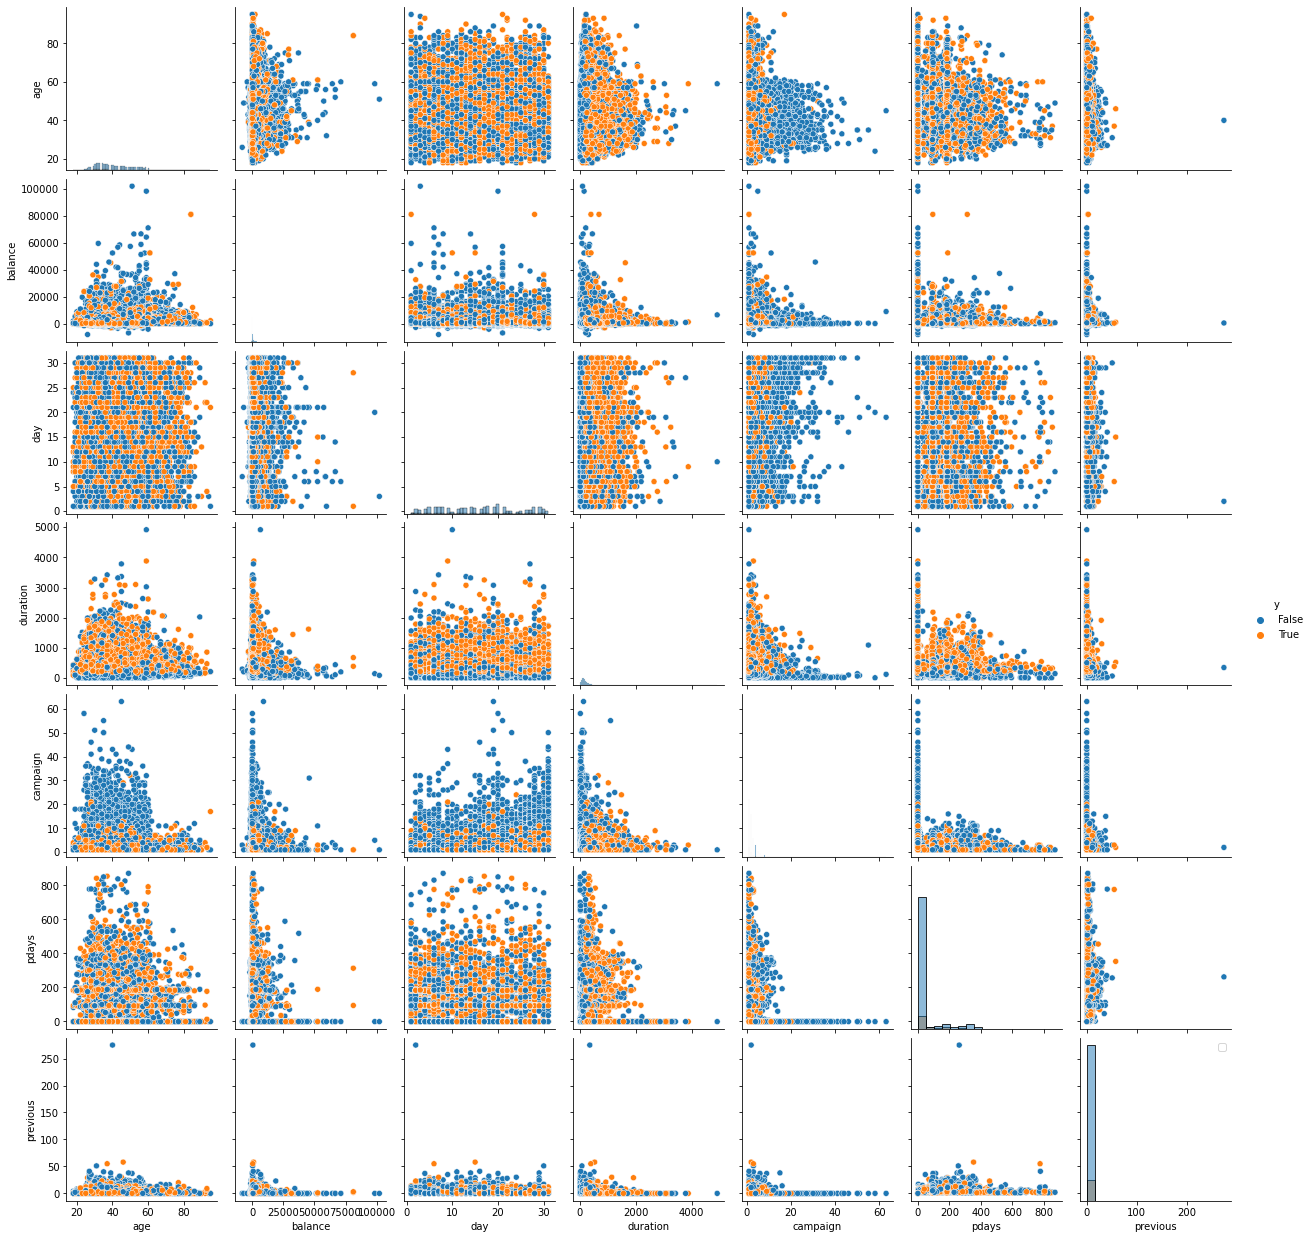

In [19]:
#tbl=pd.concat([data_raw[numerical_columns],data_raw['y']], axis=1)
#tbl.head()
sns.pairplot(data = pd.concat([data_raw[numerical_columns],data_raw['y']], axis=1), hue='y', diag_kind='hist')
plt.legend()
pass

Вычислим матрицу корреляции для количественных признаков:

In [20]:
corr_mat = data_raw.corr()
corr_mat

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
age,1.000000,-0.017879,0.097783,-0.185513,-0.015655,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
default,-0.017879,1.000000,-0.066745,-0.006025,0.077234,0.009424,-0.010021,0.016822,-0.029979,-0.018329,-0.022419
balance,0.097783,-0.066745,1.000000,-0.068768,-0.084350,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
housing,-0.185513,-0.006025,-0.068768,1.000000,0.041323,-0.027982,0.005075,-0.023599,0.124178,0.037076,-0.139173
loan,-0.015655,0.077234,-0.084350,0.041323,1.000000,0.011370,-0.012412,0.009980,-0.022754,-0.011043,-0.068185
day,-0.009120,0.009424,0.004503,-0.027982,0.011370,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,-0.010021,0.021560,0.005075,-0.012412,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,0.016822,-0.014578,-0.023599,0.009980,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,-0.029979,0.003435,0.124178,-0.022754,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,-0.018329,0.016674,0.037076,-0.011043,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236


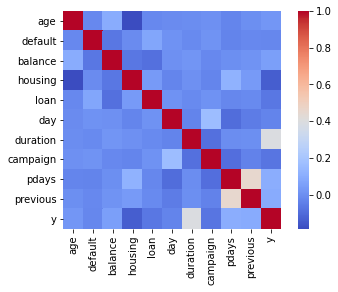

In [21]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

In [22]:
corr_mat > 0.25

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
age,True,False,False,False,False,False,False,False,False,False,False
default,False,True,False,False,False,False,False,False,False,False,False
balance,False,False,True,False,False,False,False,False,False,False,False
housing,False,False,False,True,False,False,False,False,False,False,False
loan,False,False,False,False,True,False,False,False,False,False,False
day,False,False,False,False,False,True,False,False,False,False,False
duration,False,False,False,False,False,False,True,False,False,False,True
campaign,False,False,False,False,False,False,False,True,False,False,False
pdays,False,False,False,False,False,False,False,False,True,True,False
previous,False,False,False,False,False,False,False,False,True,True,False


Можно увидеть небольшую корреляцию между **y** и **duration**.

Проиллюстрируем некоторые данные:

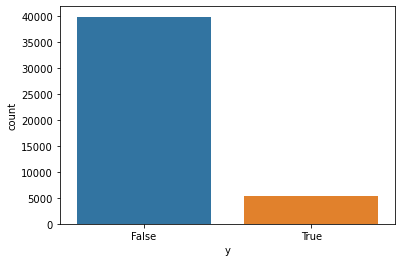

In [23]:
sns.countplot(x='y', data=data_raw)
pass

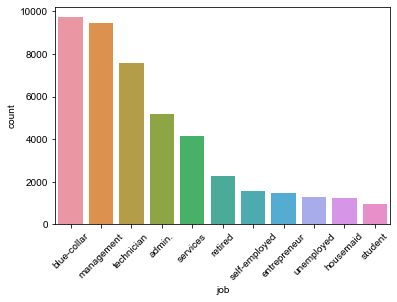

In [24]:
g=sns.countplot(x='job', order=data_raw['job'].value_counts().index, data=data_raw)
sns.set(font_scale=1)
plt.xticks(rotation=45)
pass


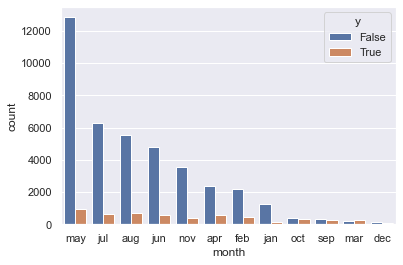

In [25]:
sns.countplot(x='month', order=data_raw['month'].value_counts().index, hue='y', data=data_raw)
pass

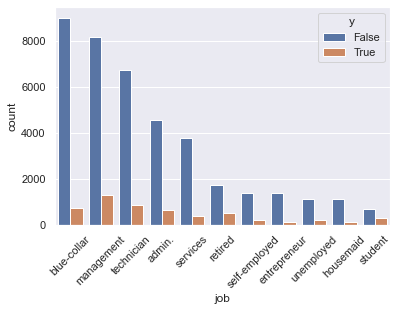

In [26]:
sns.countplot(x='job', order=data_raw['job'].value_counts().index, hue='y', data=data_raw)
plt.xticks(rotation=45)
pass

   # Обработка пропущенных значений 

Посмотрим, сколько пропущенных значений в каждом столбце матрицы:

In [27]:
data_raw.isna().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

Заметим, что пропущенных значений в столбцах **poutcome** и **contact** очень много, поэтому удалим эти столбцы. Остальные значения заполним модой.

Пропущенных значений в числовых признаках нет.

In [28]:
data_raw=data_raw.drop('poutcome', 1)
data_raw=data_raw.drop('contact', 1)

In [29]:
data_raw['job'].fillna(data_raw['job'].mode().iloc[0], inplace=True)
data_raw['education'].fillna(data_raw['education'].mode().iloc[0], inplace=True)

#  Бинаризация категориальных признаков

Заменим бинарные признаки в столбцах **default**, **housing**, **loan**, **y** на числовые.

In [30]:
data_raw['default'] = pd.factorize(data_raw['default'])[0]
data_raw['housing'] = pd.factorize(data_raw['housing'])[0]
data_raw['loan'] = pd.factorize(data_raw['loan'])[0]
data_raw['y'] = pd.factorize(data_raw['y'])[0]

bin_table=pd.concat((data_raw['default'],data_raw['housing'],data_raw['loan'],data_raw['y']),axis=1)
bin_table.head()

,default,housing,loan,y
0,0,0,0,0
1,0,0,0,0
2,0,0,1,0
3,0,0,0,0
4,0,1,0,0


К категориальным признакам **job**, **marital**, **education**, **month** применим метод бинаризации:

In [31]:
job_dummies = pd.get_dummies(data_raw['job'])
marital_dummies = pd.get_dummies(data_raw['marital'])
education_dummies = pd.get_dummies(data_raw['education'])
month_dummies = pd.get_dummies(data_raw['month'])

In [32]:
cat_table=pd.concat((job_dummies, marital_dummies,education_dummies,month_dummies), axis=1)

In [33]:
cat_table.head()

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single,primary,secondary,tertiary,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


# Нормализация количественных признаков 

Выполним стандартизацию всех признаков:

In [34]:
data_num_stand = (data_raw[numerical_columns]- data_raw[numerical_columns].mean(axis = 0))/data_raw[numerical_columns].std(axis = 0)

In [35]:
data_num_stand.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04
mean,2.135579e-16,-4.067535e-16,-3.063960e-14,-5.313654e-17,1.723756e-14,1.057063e-13,-1.007183e-13
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.159970e+00,-3.081114e+00,-1.779088e+00,-1.002467e+00,-5.693443e-01,-4.114486e-01,-2.519376e-01
25%,-7.473762e-01,-4.237673e-01,-9.379923e-01,-6.025100e-01,-5.693443e-01,-4.114486e-01,-2.519376e-01
50%,-1.823386e-01,-3.002766e-01,2.326005e-02,-3.035132e-01,-2.465576e-01,-4.114486e-01,-2.519376e-01
75%,6.652178e-01,2.158719e-02,6.240428e-01,2.362344e-01,7.622910e-02,-4.114486e-01,-2.519376e-01
max,5.091346e+00,3.309441e+01,1.825608e+00,1.809450e+01,1.944343e+01,8.297339e+00,1.191347e+02


### Соединим все в однй таблицу:

In [36]:
data_stand=pd.concat((data_num_stand,bin_table, cat_table),axis=1)
data_stand.head()

,age,balance,day,duration,campaign,pdays,previous,default,housing,loan,y,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single,primary,secondary,tertiary,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,1.606947,0.256416,-1.298462,0.011016,-0.569344,-0.411449,-0.251938,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,0.288526,-0.437890,-1.298462,-0.416122,-0.569344,-0.411449,-0.251938,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,-0.747376,-0.446758,-1.298462,-0.707353,-0.569344,-0.411449,-0.251938,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.571045,0.047205,-1.298462,-0.645224,-0.569344,-0.411449,-0.251938,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,-0.747376,-0.447086,-1.298462,-0.233618,-0.569344,-0.411449,-0.251938,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


#  Отбор признаков

In [61]:
data_stand.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'default', 'housing', 'loan', 'y', 'admin.', 'blue-collar',
       'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed',
       'services', 'student', 'technician', 'unemployed', 'divorced',
       'married', 'single', 'primary', 'secondary', 'tertiary', 'apr', 'aug',
       'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep'],
      dtype='object')

Будем использовать все входные данные, кроме **campaign**, **pdays**, **previous**.

In [62]:
y = data_stand['y']
X = data_stand.drop(['campaign', 'pdays', 'previous','y'], axis=1)
features_names=X.columns
X.head()

,age,balance,day,duration,default,housing,loan,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single,primary,secondary,tertiary,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,1.606947,0.256416,-1.298462,0.011016,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,0.288526,-0.437890,-1.298462,-0.416122,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,-0.747376,-0.446758,-1.298462,-0.707353,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.571045,0.047205,-1.298462,-0.645224,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,-0.747376,-0.447086,-1.298462,-0.233618,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 369)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

33908 11303


#  Классификаторы 

## *k*NN 

In [87]:
from sklearn.neighbors import KNeighborsClassifier
arr_train_e=[]
arr_test_e=[]
x_ax=[]
err_test=0
err_train=0
for k in range(1,50,5):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    arr_test_e.append(1 - knn.score(X_test, y_test))
    arr_train_e.append(1- knn.score(X_train, y_train))
    x_ax.append(k)

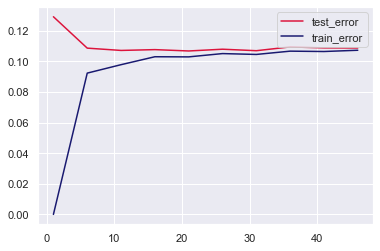

In [88]:
plt.plot(x_ax,arr_test_e, color='crimson')
plt.plot(x_ax,arr_train_e, color='midnightblue')
plt.legend(['test_error','train_error'])
pass

На графике можно заметить, что брать k > 10 не имеет смысла, т.к. ошибка сильно не уменьшится.

Минимальная ошибка на тестовой выборке составила 10,6% k=20.

Минимальная ошибка на обучающей выборке составила 0% при k=1

## Random Forest

In [89]:
from sklearn import ensemble
arr_train_e=[]
arr_test_e=[]
x_ax=[]
err_test=0
err_train=0
for k in range(1,1002,100):
    rf = ensemble.RandomForestClassifier(n_estimators = k)
    rf.fit(X_train, y_train)
    arr_test_e.append(1 - rf.score(X_test, y_test))
    arr_train_e.append(1- rf.score(X_train, y_train))
    x_ax.append(k)

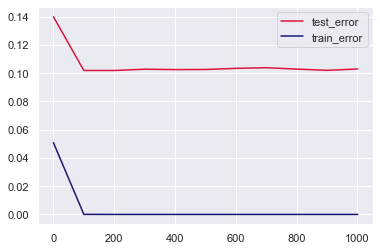

In [90]:
plt.plot(x_ax,arr_test_e, color='crimson')
plt.plot(x_ax,arr_train_e, color='midnightblue')
plt.legend(['test_error','train_error'])
pass

Минимальная ошибка на тестовой выборке составила 10,1% n=100.

Минимальная ошибка на обучающей выборке составила 0% при n>100.

### Значимость признаков
Выведем значимость признаком и применим классификатор **Random Forest** к "более важным" признакам.

In [91]:
d=len(features_names)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, features_names[indices[f]], importances[indices[f]]))

Feature ranking:
 1. feature 'duration' (0.310581)
 2. feature 'balance' (0.137322)
 3. feature '  age' (0.129614)
 4. feature '  day' (0.116922)
 5. feature 'housing' (0.020631)
 6. feature '  mar' (0.015975)
 7. feature '  oct' (0.015704)
 8. feature '  apr' (0.013832)
 9. feature '  sep' (0.013581)
10. feature 'technician' (0.011976)
11. feature 'married' (0.011879)
12. feature 'management' (0.011413)
13. feature 'secondary' (0.011362)
14. feature ' loan' (0.011313)
15. feature 'tertiary' (0.011058)
16. feature '  feb' (0.010402)
17. feature 'single' (0.010322)
18. feature '  may' (0.010171)
19. feature 'admin.' (0.010146)
20. feature '  aug' (0.009967)
21. feature 'blue-collar' (0.009650)
22. feature '  nov' (0.009649)
23. feature '  jul' (0.009166)
24. feature '  jun' (0.009030)
25. feature 'divorced' (0.008112)
26. feature 'primary' (0.007224)
27. feature 'services' (0.007072)
28. feature 'student' (0.006707)
29. feature '  dec' (0.006528)
30. feature 'unemployed' (0.005731)
31. 

Будем использовать все входные данные, кроме **campaign**, **pdays**, **previous**, **default**.

In [92]:
new_data = pd.concat((data_num_stand,bin_table,month_dummies),axis=1)
new_data.head()
y1=new_data['y']
X1=new_data.drop(['campaign', 'pdays', 'previous','default','y'], axis=1)


In [93]:
X1.head()

,age,balance,day,duration,housing,loan,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,1.606947,0.256416,-1.298462,0.011016,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.288526,-0.437890,-1.298462,-0.416122,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,-0.747376,-0.446758,-1.298462,-0.707353,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0.571045,0.047205,-1.298462,-0.645224,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,-0.747376,-0.447086,-1.298462,-0.233618,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [96]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25, random_state = 369)

N_train, _ = X1_train.shape 
N_test,  _ = X1_test.shape 

print(N_train, N_test)

33908 11303


In [97]:
arr_train_e1=[]
arr_test_e1=[]
x_ax1=[]
err_test1=0
err_train1=0
for k in range(1,1002,100):
    rf1 = ensemble.RandomForestClassifier(n_estimators = k)
    rf1.fit(X1_train, y1_train)
    arr_test_e1.append(1 - rf1.score(X1_test, y1_test))
    arr_train_e1.append(1- rf1.score(X1_train, y1_train))
    x_ax1.append(k)


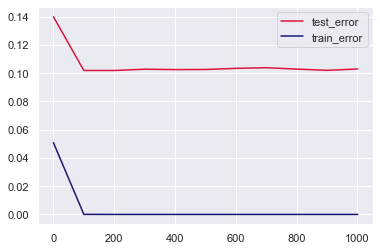

In [98]:
plt.plot(x_ax,arr_test_e, color='crimson')
plt.plot(x_ax,arr_train_e, color='midnightblue')
plt.legend(['test_error','train_error'])
pass

Минимальная ошибка на тестовой выборке составила 10,2% n=100.

Минимальная ошибка на обучающей выборке составила 0% при n>100.

## GBT

In [99]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
arr_train_e=[]
arr_test_e=[]
x_ax=[]
err_test=0
err_train=0
for k in range(1,1002,100):
    gbt = ensemble.GradientBoostingClassifier(n_estimators = k)
    gbt.fit(X_train, y_train)
    arr_test_e.append(1 - gbt.score(X_test, y_test))
    arr_train_e.append(1- gbt.score(X_train, y_train))
    x_ax.append(k)

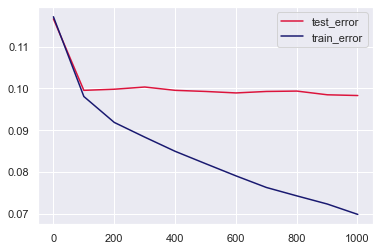

In [100]:
plt.plot(x_ax,arr_test_e, color='crimson')
plt.plot(x_ax,arr_train_e, color='midnightblue')
plt.legend(['test_error','train_error'])
pass

Минимальная ошибка на тестовой выборке составила 9,8% n=1000.

Минимальная ошибка на обучающей выборке составила 7% при n=1000.

# SVC

In [64]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print('Ошибка на обучающей выборке', err_train)
print('Ошибка на тестовой выборке', err_test)

Ошибка на обучающей выборке 0.11224489795918367
Ошибка на тестовой выборке 0.11129788551711935


# Вывод 
В данной работе было проделано:

    1. Визуализация данных и вычисление основных характеристик;
    2. Обработка пропущенных значений и категориальных признаков;
    3. Нормализация данных;
    4. Разбиение данных на обучающую и тестовую выборки;
    5. Использование различных классификаторов: "k-ближаших соседей", Random Forest, GBT,SVC;
    6. Построены графики зависимости точности классификатора, от его гиперпараметра для конкретной модели.
    
Для различных классификаторов получили следующие данные: 
1. Метод K ближайших соседей (kNN) - 10,6%
2. Random Forest - 10,1%
3. Random Forest только со значимыми признаками - 10,2%
4. GBT - 9,8%
5. SVC - 11,1%

Таким образом, GBT - алгоритм дал лучший результат.

# Борьба с несбалансированностью классов

In [102]:
df_to_balance=pd.concat((data_raw[numerical_columns],bin_table, cat_table),axis=1)
df_to_balance.head()

,age,balance,day,duration,campaign,pdays,previous,default,housing,loan,y,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single,primary,secondary,tertiary,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58,2143,5,261,1,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,44,29,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,33,2,5,76,1,-1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,47,1506,5,92,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,33,1,5,198,1,-1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [103]:
df_to_balance.shape

(45211, 40)

In [104]:
df_to_balance['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

Чтобы сбалансировать данные, уберем случайным образом 34633 строки,на которых y=0 

In [105]:
cls_frs, cls_sec = df_to_balance['y'].value_counts()
count_to_remove=cls_frs-cls_sec
data_balanced=df_to_balance
data_balanced=data_balanced.drop(data_balanced.query('y == 0').sample(count_to_remove).index)

data_balanced['y'].value_counts()


0    5289
1    5289
Name: y, dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

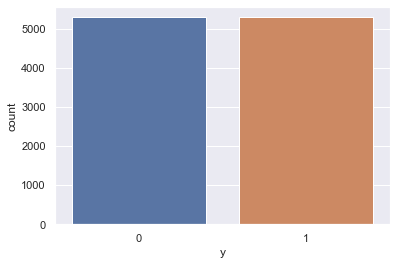

In [106]:
sns.countplot(x='y', data=data_balanced)

Выполним стандартизацию всех признаков:

In [108]:
data_balanced[numerical_columns]=(data_balanced[numerical_columns] - data_balanced[numerical_columns].mean(axis = 0))/data_balanced[numerical_columns].std(axis = 0)
data_balanced.head()

,age,balance,day,duration,campaign,pdays,previous,default,housing,loan,y,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single,primary,secondary,tertiary,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
23,-1.351402,-0.477113,-1.243182,-0.105300,-0.573248,-0.487167,-0.244699,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
32,1.554703,-0.480595,-1.243182,-0.488006,-0.573248,-0.487167,-0.244699,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
56,-0.271992,-0.358733,-1.243182,-0.785032,-0.573248,-0.487167,-0.244699,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
59,0.392261,-0.436282,-1.243182,3.995943,-0.573248,-0.487167,-0.244699,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
61,0.973482,-0.179897,-1.243182,1.237029,-0.573248,-0.487167,-0.244699,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


Будем использовать все входные данные, кроме **campaign**, **pdays**, **previous**.

In [109]:
y1=data_balanced['y']
X1=data_balanced.drop(['campaign', 'pdays', 'previous','default','y'], axis=1)
pd.concat([X1, y1],axis=1).head()

,age,balance,day,duration,housing,loan,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single,primary,secondary,tertiary,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,y
23,-1.351402,-0.477113,-1.243182,-0.105300,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
32,1.554703,-0.480595,-1.243182,-0.488006,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
56,-0.271992,-0.358733,-1.243182,-0.785032,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
59,0.392261,-0.436282,-1.243182,3.995943,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
61,0.973482,-0.179897,-1.243182,1.237029,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.25, random_state = 369)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

7933 2645


### GBT

In [111]:
from sklearn import ensemble
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
arr_train_e=[]
arr_test_e=[]
x_ax=[]
err_test=0
err_train=0
for k in range(1,1002,100):
    gbt = ensemble.GradientBoostingClassifier(n_estimators = k)
    gbt.fit(X_train, y_train)
    arr_test_e.append(1 - gbt.score(X_test, y_test))
    arr_train_e.append(1- gbt.score(X_train, y_train))
    x_ax.append(k)

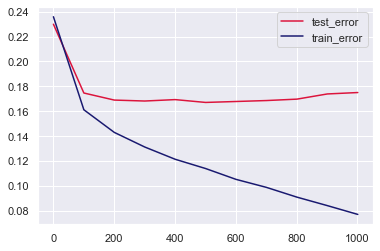

In [112]:
plt.plot(x_ax,arr_test_e, color='crimson')
plt.plot(x_ax,arr_train_e, color='midnightblue')
plt.legend(['test_error','train_error'])
pass

Минимальная ошибка на тестовой выборке примерно одинакова для n=[200,1000] и составляет ~17%

Минимальная ошибка на обучающей выборке составила 8% при n=1000.

Ошибка возрасла, так как классы были несбалансированы и точность угадывания класса 0 была выше.

 Возьмем k=300, при которой достигается минимальная ошибка на тестовой выборке

In [133]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 300)
gbt.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=300)

#### Матрица рассогласования:

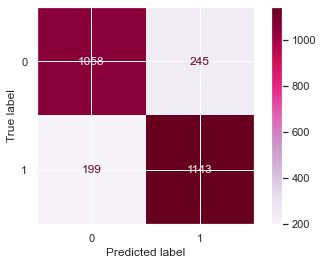

In [134]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gbt, X_test, y_test, cmap=plt.cm.PuRd)
pass

#### Точность предугадывания определенного ответа:

In [135]:
from sklearn.metrics import classification_report
print(classification_report(y_test,gbt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1303
           1       0.82      0.85      0.84      1342

    accuracy                           0.83      2645
   macro avg       0.83      0.83      0.83      2645
weighted avg       0.83      0.83      0.83      2645



# Исключение коррелированных переменных

Построим матрицу корреляции

<AxesSubplot:>

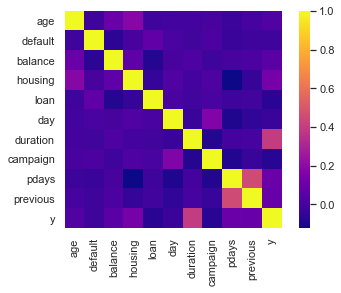

In [115]:
corr_mat1 = data_raw.corr()
sns.heatmap(corr_mat1, square=True, cmap='plasma')

Построим матрицу, у которой значения корреляции больше 0.3

<AxesSubplot:>

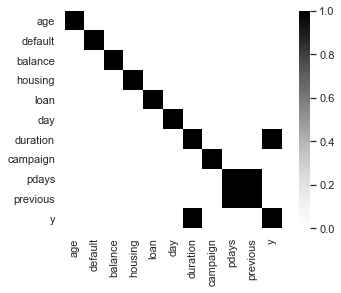

In [116]:
sns.heatmap(corr_mat1>0.3, square=True, cmap='Greys')

Можем заметить связь между duration и y, а так же связь  между pdays и previous

Посмотрим на значения корреляции

In [136]:
corr_mat1.where(np.triu(corr_mat1 > 0.3, k=1)).stack().sort_values(ascending=False)

pdays     previous    0.454820
duration  y           0.394521
dtype: float64

### Исключим их и применим GBT к полученным данным

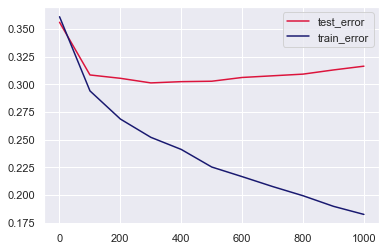

In [123]:
y2=data_balanced['y']
X2=data_balanced.drop(['campaign', 'pdays', 'previous','duration','default','y'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.25, random_state = 368)
N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

from sklearn import ensemble
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
arr_train_e=[]
arr_test_e=[]
x_ax=[]
err_test=0
err_train=0
for k in range(1,1002,100):
    gbt = ensemble.GradientBoostingClassifier(n_estimators = k)
    gbt.fit(X_train, y_train)
    arr_test_e.append(1 - gbt.score(X_test, y_test))
    arr_train_e.append(1- gbt.score(X_train, y_train))
    x_ax.append(k)
    
plt.plot(x_ax,arr_test_e, color='crimson')
plt.plot(x_ax,arr_train_e, color='midnightblue')
plt.legend(['test_error','train_error'])
pass

Можно заметить, что минимальная ошибка на тестовой выборке увеличилась и теперь составляет приблизительно 30% при n=300

Так же видно, что при n>300 видно переобучение модели, ошибка возрастает

Минимальная ошибка на тренировочной выборке тоже возрасла и теперь достигает 18% при n=1000

 Возьмем k=300, при которой достигается минимальная ошибка на тестовой выборке

In [128]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 300)
gbt.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=300)

#### Матрица рассогласования:

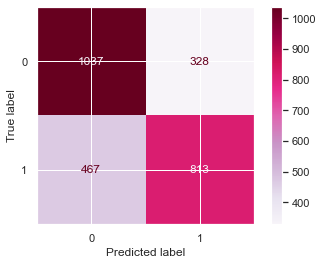

In [129]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gbt, X_test, y_test, cmap=plt.cm.PuRd)
pass

Количество False-Negative и False-Positive предсказаний увеличилось, причем FN предсказний больше, чем FP

Можно сказать, что удаление корреляционных переменных негативно сказалось на предсказательную способность

#### Точность предугадывания определенного ответа:

In [130]:

from sklearn.metrics import classification_report
print(classification_report(y_test,gbt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      0.76      0.72      1365
           1       0.71      0.64      0.67      1280

    accuracy                           0.70      2645
   macro avg       0.70      0.70      0.70      2645
weighted avg       0.70      0.70      0.70      2645



# Вывод

Исходя из проделанной работы, можно сделать следующие выводы:
<ul>
    <li>Сбалансированность классов привела к примерно одинаковой точности предугадывания классов, при этом минимальная ошибка увеличилась до 17%, а количество FP предсказаний чуть больше, чем FN</li>
    <li>Удаление коррелированных переменных увеличило минимальную ошибку до 30%, при этом число FN предсказаний стало больше, чем FP</li>
</ul>